# Plasma Beta with FGM and FPI data

This notebook shows how to calculate plasma beta with FGM and FPI data

## Get started

In [2]:
from pyspedas.mms import fgm, fpi # load routines
from pyspedas import tinterpol # interpolate tplot variables
from pytplot import tplot, get_data, store_data # plot, access, and create tplot variables

## Define some constants

In [3]:
mu0 = 1256.0 # nT-m/A
Kb = 1.3807*10**(-16.) # cm^2-g-1/s^2-1/K

## Set some options for the load routines

In [4]:
probe = '1'
trange = ['2015-10-16/11:00', '2015-10-16/14:00']

## Load the FGM and FPI data

In [5]:
fgm_vars = fgm(trange=trange, probe=probe)
fpi_vars = fpi(datatype=['dis-moms', 'des-moms'], trange=trange, probe=probe, center_measurement=True)

SDC username (blank for public access): 


26-Jan-22 23:45:57: Downloading mms1_fgm_srvy_l2_20151016_v4.18.0.cdf to pydata/mms1/fgm/srvy/l2/2015/10


The lengths of x and y do not match!
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
mms1_fgm_rdeltahalf_srvy_l2 is currently not in pytplot.
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
mms1_fgm_b_gse_srvy_l2
mms1_fgm_b_gsm_srvy_l2
mms1_fgm_b_dmpa_srvy_l2
mms1_fgm_b_bcs_srvy_l2
mms1_fgm_flag_srvy_l2
Epoch_state
mms1_fgm_hirange_srvy_l2
mms1_fgm_bdeltahalf_srvy_l2
mms1_fgm_stemp_srvy_l2
mms1_fgm_etemp_srvy_l2
mms1_fgm_mode_srvy_l2
mms1_fgm_rdeltahalf_srvy_l2
mms1_fgm_b_dmpa_srvy_l2_bvec
mms1_fgm_b_dmpa_srvy_l2_btot
mms1_fgm_b_gse_srvy_l2_bvec
mms1_fgm_b_gse_srvy_l2_btot
mms1_fgm_b_gsm_srvy_l2_bvec
mms1_fgm_b_gsm_srvy_l2_btot
mms1_fgm_b_bcs_srvy_l2_bvec
mms1_fgm_b_bcs_srvy_l2_btot


26-Jan-22 23:46:18: Downloading mms1_fpi_fast_l2_dis-moms_20151016100000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/dis-moms/2015/10
26-Jan-22 23:46:19: Downloading mms1_fpi_fast_l2_dis-moms_20151016120000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/dis-moms/2015/10
26-Jan-22 23:46:19: Downloading mms1_fpi_fast_l2_des-moms_20151016100000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10
26-Jan-22 23:46:20: Downloading mms1_fpi_fast_l2_des-moms_20151016120000_v3.3.0.cdf to pydata/mms1/fpi/fast/l2/des-moms/2015/10


That name is currently not in pytplot
That name is currently not in pytplot
That name is currently not in pytplot
Loaded variables:
Epoch
Epoch_plus_var
Epoch_minus_var
mms1_des_errorflags_fast
mms1_des_compressionloss_fast
mms1_des_startdelphi_count_fast
mms1_des_startdelphi_angle_fast
mms1_des_pitchangdist_lowen_fast
mms1_des_pitchangdist_miden_fast
mms1_des_pitchangdist_highen_fast
mms1_des_energyspectr_px_fast
mms1_des_energyspectr_mx_fast
mms1_des_energyspectr_py_fast
mms1_des_energyspectr_my_fast
mms1_des_energyspectr_pz_fast
mms1_des_energyspectr_mz_fast
mms1_des_energyspectr_par_fast
mms1_des_energyspectr_anti_fast
mms1_des_energyspectr_perp_fast
mms1_des_energyspectr_omni_fast
mms1_des_numberdensity_fast
mms1_des_numberdensity_err_fast
mms1_des_densityextrapolation_low_fast
mms1_des_densityextrapolation_high_fast
mms1_des_bulkv_dbcs_fast
mms1_des_bulkv_spintone_dbcs_fast
mms1_des_bulkv_gse_fast
mms1_des_bulkv_spintone_gse_fast
mms1_des_bulkv_err_fast
mms1_des_prestensor_dbcs_f

## Set some variable names

In [6]:
temp_para_i = 'mms'+probe+'_dis_temppara_fast'
temp_perp_i = 'mms'+probe+'_dis_tempperp_fast'
temp_para_e = 'mms'+probe+'_des_temppara_fast'
temp_perp_e = 'mms'+probe+'_des_tempperp_fast'
number_density_i = 'mms'+probe+'_dis_numberdensity_fast'
number_density_e = 'mms'+probe+'_des_numberdensity_fast'
b_field = 'mms'+probe+'_fgm_b_gsm_srvy_l2'
b_magnitude = 'mms'+probe+'_fgm_b_gsm_srvy_l2_mag'

## Split the B-field magnitude into its own variable

In [7]:
times, data = get_data(b_field)
store_data(b_magnitude, data={'x': times, 'y': data[:, 3]})

True

## Interpolate the B-field data to the FPI time stamps

In [8]:
tinterpol(b_magnitude, number_density_i, newname=['b_mag_interpolated'])

tinterpol (linear) was applied to: b_mag_interpolated


## Extract the data from the pyTplot variables

In [9]:
btimes, bdata = get_data('b_mag_interpolated')

ipatimes, i_para_temp = get_data(temp_para_i)
ipetimes, i_perp_temp = get_data(temp_perp_i)
epatimes, e_para_temp = get_data(temp_para_e)
epetimes, e_perp_temp = get_data(temp_perp_e)

nitimes, i_n = get_data(number_density_i)
netimes, e_n = get_data(number_density_e)

## Calculate the magnetic pressure

note: 1.0e-8 comes from A-nT/m -> g/(s^2-cm)

In [10]:
Pmag = 1.0e-8*bdata**2/(2.0*mu0)

## Calculate the ion and electron temperatures

In [11]:
Te_total=(e_para_temp+2*e_perp_temp)/3.0
Ti_total=(i_para_temp+2*i_perp_temp)/3.0

## Calculate the plasma pressure

note: eV -> K conversion: 11604.505 K/eV

In [12]:
Pplasma = (i_n*11604.505*Ti_total+e_n*11604.505*Te_total)*Kb

## Calculate plasma beta

In [13]:
Beta = Pplasma/Pmag

## Store the data in pyTplot variables

In [14]:
store_data('plasma_beta', data={'x': btimes, 'y': Beta})
store_data('magnetic_pressure', data={'x': btimes, 'y': Pmag})
store_data('plasma_pressure', data={'x': btimes, 'y': Pplasma})

True

## Plot the results

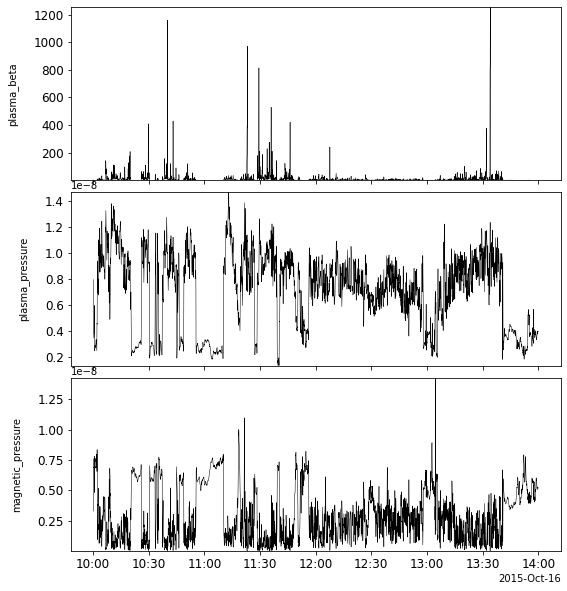

In [15]:
tplot(['plasma_beta', 'plasma_pressure', 'magnetic_pressure'])